# Analiza slovenskih državnih tekmovanj v sestavljanju 3x3 rubikove kocke

## Uvod

Hitrostno sestavljanje rubikove kocke je hobi, ki je v zadnjih dvajsetih letih precej razcvetel v popularnosti. Zaradi velikega povpraševanja, so bila v začetku drugega tisočletja prvič organizirana tekmovanja v hitrostnem sestavljanju rubikove kocke, kmalu zatem, pa je bila ustanovljena mednarodna zveza za kockanje, znana tudi kot WCA (World Cube Association). Vse podatke v nalogi sem pridobil iz njihove uradne spletne strani (https://www.worldcubeassociation.org/). Tudi v Sloveniji skupina prostovoljcev od leta 2010 dalje organizira tekmovanja, ki jih odobri organizacija WCA. Ker je bilo do novembra 2025 organiziranih že kar 38 tekmovanj, sem se za analizo odločil osredotočiti le na največja in najpomembnejša - t.j. državna tekmovanja. Ta potekajo enkrat na leto od leta 2018 dalje in so veliko bolj prestižna. Na žalost podatki za leta 2018 in 2022 niso na voljo (problem s spletno stranjo, ne s programom), prav tako pa tekmovanja v letih 2020 in 2021 ni bilo zaradi karantene. Na državna tekmovanja lahko pridejo tudi tekmovalci iz tujine, vendar za zmagovalca tekmovanja velja najhitrejši Slovenec.

Za interpretacijo analize je potrebno osnovno znanje o potekanju tekmovanj. Na vsakem tekmovanju je več disciplin, t.j. tekmovalci se lahko primerjajo v sestavljanju več različnih tipov rubikovih kock (2x2x2, 3x3x3, 4x4x4 rubikova kocka, pyraminx, megaminx...). Najpopularnejša disciplina je klasična 3x3 rubikova kocka, zato se bom tudi nanjo osredotočal. Vsaka disciplina pa načeloma poteka v več krogih (rundah). V prvem krogu lahko sodelujejo vsi, v naslednje kroge pa pride le določen procent najhitrejših sestavljalcev. V zadnji krog (finali) pa navadno pride le najboljših 10-16 tekmovalcev. V vsakem krogu ima tekmovalec 5 poskusov. V vsakem poskusu dobi tekmovalec zmešano kocko, ki jo sestavi v prisotnosti sodnika, ki zagotovi, da se je čas pravlino meril. V vsakem krogu se poleg samih časov zabeleži posebej tudi najhitrejši poskus (t.i. "single") in povprečje (t.i. "average") vsakega tekmovalca, ki se izračuna tako da se znebimo najhitrejšega in najpočasnejšega časa, nato pa naredimo povprečje preostalih treh. Za uvrstitev na tekmovanju več šteje povprečje, saj je v najhitrejšem poskusu navadno prisotno tudi nekaj sreče. V podatkih bomo včasih zasledili tudi podatek o državnem rekordu (NR), celinskem rekordu (CR) ali svetovnem rekordu (CR). Te se zabeležijo bodisi k single ali average podatku, če je bil kateri od rekordov dosežen.

Cilj analize je spremljati razvoj državnih tekmovanj (število tekmovalcev, zastopanost držav...) in rezultate na tekmovanjih (spreminjanje časov na tekmovanjih, rekordi...), kjer se bom pogosto posebej osredotočil na Slovence.

Najprej uvozimo potrebne knjižnice in si pripravimo podatke:

In [ ]:
# Knjižnice
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Preberemo csv datoteko in shranimo podatke v spremenljivko
podatki = pd.read_csv("datoteke/csv/SlovenianNationals.csv", index_col = "Mesto")

# Podatki s časi so shranjeni kot tip object, zato jih spremenimo v numeric, rezultati DNF so zdaj zapisani kot NaN
podatki["Single"] = pd.to_numeric(podatki["Single"], errors = "coerce")
podatki["Average"] = pd.to_numeric(podatki["Average"], errors = "coerce")

# Podatki o državah so shranjeni v nestandardnem formatu, zato jih ročno pretvorimo s slovarjem
def convert_imena_drzav(drzava):
    mapping = {
        "si" : "SLO",
        "hr" : "CRO",
        "at" : "AUT",
        "ba" : "BIH",
        "bg" : "BEL",
        "ca" : "CAN",
        "de" : "GER",
        "es" : "ESP",
        "fr" : "FRA",
        "gb" : "GBR",
        "hu" : "HUN",
        "ie" : "IRL",
        "iq" : "IRQ",
        "it" : "ITA",
        "nl" : "NED",
        "pl" : "POL",
        "rs" : "SRB",
        "ru" : "RUS",
        "sk" : "SVK",
        "ua" : "UKR",
        "xk" : "KOS"

    }
    return mapping.get(drzava, drzava)
podatki["Drzava"] = podatki["Drzava"].apply(convert_imena_drzav)

# Pogosto bom uporabljal ta seznam za označevanje podatkov v tabeli
Leta = [2019,2022,2023,2024,2025]

## Sestava tekmovanj

Najprej si oglejmo obiskanost tekmovanj po letih. Opazimo, da so tekmovanja vsako leto večja in da se je v obdobju korone povečal interes, kljub temu da takrat ni bilo nobenih tekmovanj.

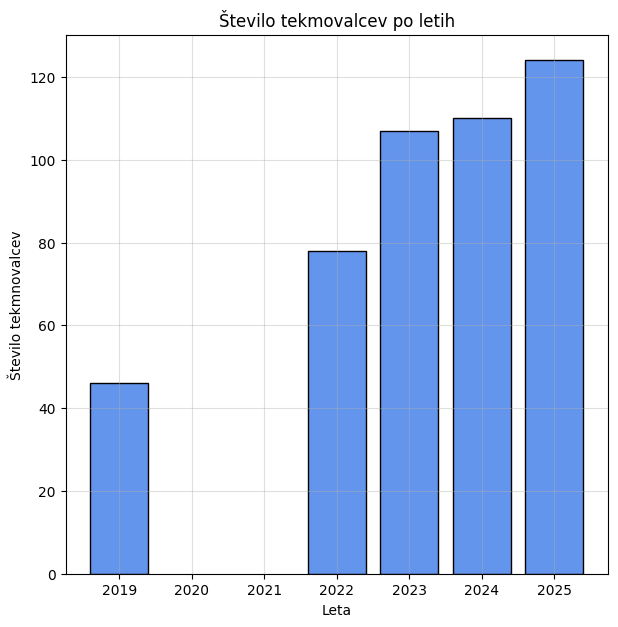

In [ ]:
# Filtri
f_r1 = podatki["ImeRunde"] == "3x3x3 Cube First round" # Filtriramo ven samo prvo rundo, da se vsak tekmovalec pojavi le enkrat
st_tekmovalcev = podatki[f_r1]

graf  = st_tekmovalcev.groupby("Leto").size()

# Nastavitve za graf
plt.figure(figsize=(7, 7))
plt.bar(Leta, graf, color = "cornflowerblue", edgecolor = "black")
plt.title("Število tekmovalcev po letih")
plt.xlabel("Leta")
plt.ylabel("Število tekmnovalcev")
plt.grid(True, alpha = 0.4)
plt.show()

Zdaj si oglejmo še zastopanost držav v letih 2019 in 2024 in 2025. Opazimo, da so v letih 2019 - 2024 slovenci predstavljali občutno večji delež tekmovanja kot v letu 2025. To se opazi tudi na tekmovanjih, kjer so obvestila zdaj podana dvojezično, t.j. v angleščini in slovenščini. Prav tako to kaže na mednarodno priznanost slovenskih tekmovanj.

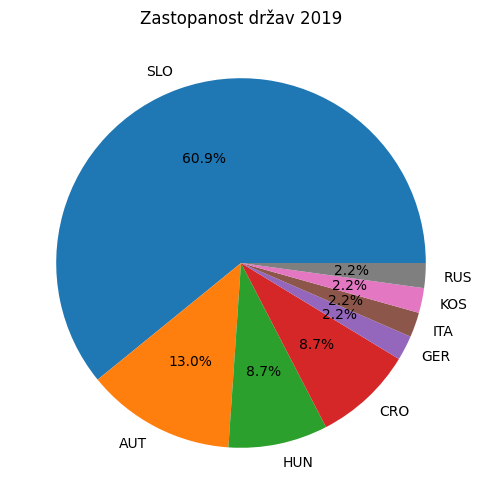

In [277]:
# Filtri
f_2019 = podatki["Leto"] == 2019
f_2019_r1 = f_2019 & f_r1 # Filtriramo ven prvo rundo leta 2019

graf = podatki[f_2019_r1].groupby("Drzava").size().sort_values(ascending = False)

plt.figure(figsize=(6, 6))
plt.pie(graf, labels = graf.index, autopct = "%1.1f%%") # Autopct nam napiše odstotke na graf
plt.title("Zastopanost držav 2019")
plt.show()

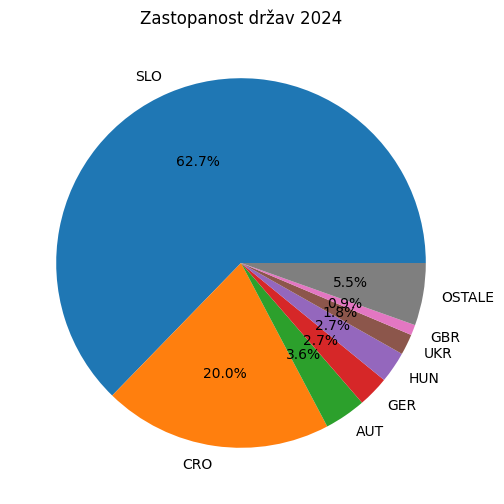

In [278]:
# Filtri
f_2024 = podatki["Leto"] == 2024
f_2024_r1 = f_2024 & f_r1

zastopanost = podatki[f_2024_r1].groupby("Drzava").size().sort_values(ascending = False)

# Na grafu napišemo le prvih 7 držav, preostale seštejemo v košček ostale
prvih_7 = zastopanost.head(7)
ostale = zastopanost[7:].sum()
podatki_za_graf = prvih_7.copy()
podatki_za_graf["OSTALE"] = ostale

plt.figure(figsize=(6, 6))
plt.pie(podatki_za_graf, labels = podatki_za_graf.index, autopct = "%1.1f%%")
plt.title("Zastopanost držav 2024")
plt.show()

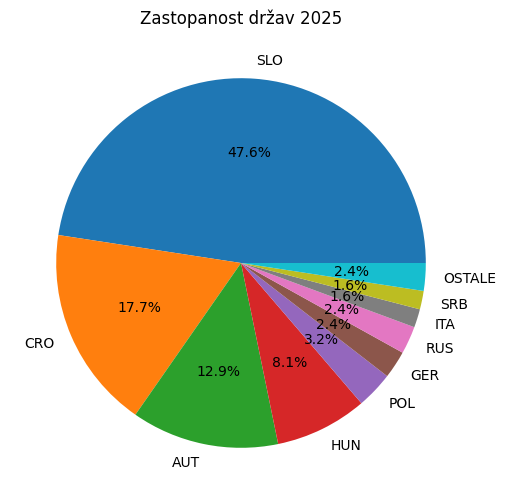

In [279]:
f_2025 = podatki["Leto"] == 2025
f_2025_r1 = f_2025 & f_r1

zastopanost = podatki[f_2025_r1].groupby("Drzava").size().sort_values(ascending = False)
prvih_9 = zastopanost.head(9)
ostale = zastopanost[9:].sum()

podatki_za_graf = prvih_9.copy()
podatki_za_graf["OSTALE"] = ostale

plt.figure(figsize=(6, 6))
plt.pie(podatki_za_graf, labels = podatki_za_graf.index, autopct = "%1.1f%%")
plt.title("Zastopanost držav 2025")
plt.show()

Zdaj si oglejmo še vsa leta skupaj združena v eno pito. Opazimo, da prevladuje predvsem Slovenija, sledijo pa ji hrvaška, madžarska in avstrijska zasedba.

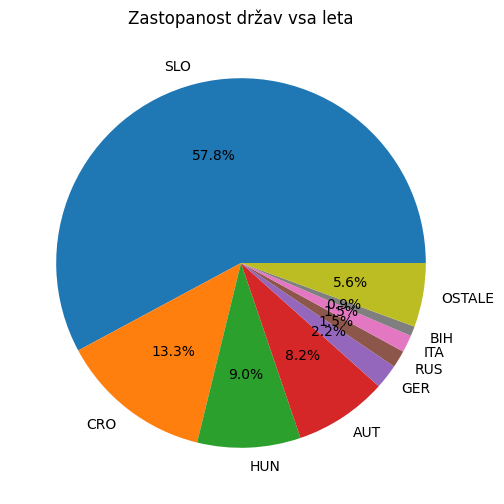

In [280]:
zastopanost = podatki[f_r1].groupby("Drzava").size().sort_values(ascending = False)
prvih_8 = zastopanost.head(8)
ostale = zastopanost[8:].sum()

podatki_za_graf = prvih_8.copy()
podatki_za_graf["OSTALE"] = ostale

plt.figure(figsize=(6, 6))
plt.pie(podatki_za_graf, labels = podatki_za_graf.index, autopct = "%1.1f%%")
plt.title("Zastopanost držav vsa leta")
plt.show()

## Pregled časov

Zanima nas koliko so se ljudje izboljšali v zadnjih nekaj letih. Dober pokazatelj tega je zmagovalno povprečje in njegov pripadajoči najhitrejši čas.

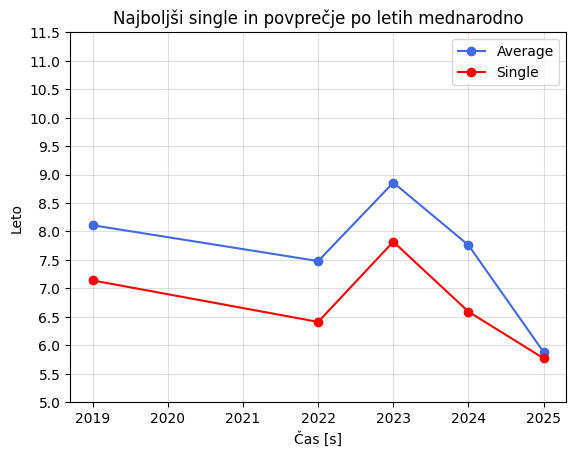

       Average  Single  Leto
Mesto                       
1         8.11    7.14  2019
1         7.48    6.41  2022
1         8.86    7.82  2023
1         7.76    6.59  2024
1         5.88    5.77  2025


In [281]:
# Filtri
f_finali = podatki["ImeRunde"] == "3x3x3 Cube Final"
finali = podatki[f_finali]

# Iz podatkov vzamemo le najhitrejše povprečje v finalih in si zraven zapišemo še leto in pripadajoči single
manjsi_finali = finali[["Average", "Single", "Leto"]].copy()
najboljsi = manjsi_finali.groupby("Leto").head(1)

# Predelamo tabelo v podatke za graf in si nastavimo indekse
graf_m = pd.DataFrame(najboljsi)
graf_m = graf_m.set_index("Leto")

graf_m.plot(y = ["Average", "Single"], color = ["royalblue", "red"], marker = "o")
plt.title("Najboljši single in povprečje po letih mednarodno")
plt.xlabel("Čas [s]")
plt.ylabel("Leto")
yticks = np.arange(5, 12, 0.5) # Nastavimo največjo in najmanjšo ter razmak med y vrednostmi
plt.yticks(yticks)
plt.grid(True, alpha = 0.4)
plt.show()

# Podatki so pregledni tudi v tabeli
print(najboljsi)

Toda večino teh rezultatov pripada tujim tekmovalcem, oglejmo si še isti graf, kjer vzamemo najboljši slovenskih čas iz finalov:

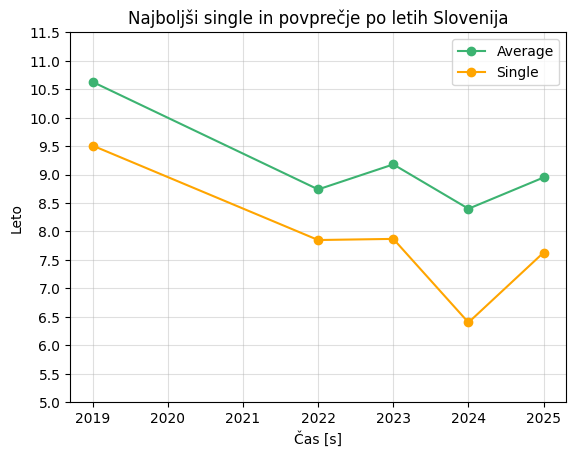

       Average  Single  Leto
Mesto                       
5        10.63    9.51  2019
2         8.74    7.85  2022
4         9.18    7.87  2023
4         8.40    6.40  2024
9         8.95    7.63  2025


In [282]:
f_slo = podatki["Drzava"] == "SLO"
f_finali = podatki["ImeRunde"] == "3x3x3 Cube Final"
f_slo_finali = f_slo & f_finali

slo_finali = podatki[f_slo_finali]
manjsi_finali = slo_finali[["Average", "Single", "Leto"]].copy()
najboljsi = manjsi_finali.groupby("Leto").head(1)

graf_s = pd.DataFrame(najboljsi)
graf_s = graf_s.set_index("Leto")

graf_s.plot(y = ["Average", "Single"], color = ["mediumseagreen", "orange"], marker = "o")
plt.title("Najboljši single in povprečje po letih Slovenija")
plt.xlabel("Čas [s]")
plt.ylabel("Leto")
yticks = np.arange(5, 12, 0.5)
plt.yticks(yticks)
plt.grid(True, alpha = 0.4)
plt.show()

# Podatki so pregledni tudi v tabeli
print(najboljsi)

Če grafa združimo lahko opazimo, da Slovenci še nismo na nivoju nekaterih naših sosedov:

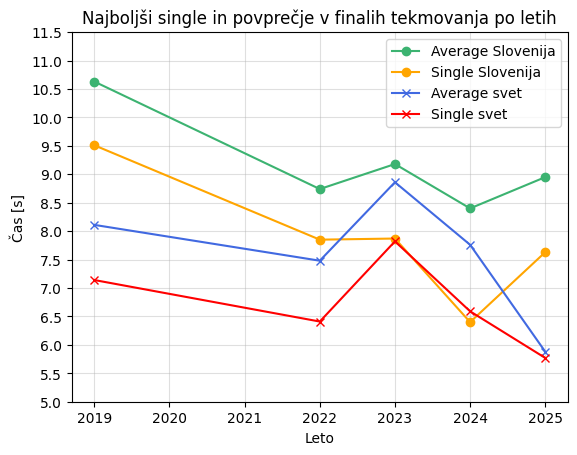

In [283]:
# Preimenujemo podakte za preglednost
graf1 = graf_s.rename(columns = {"Average" : "Average Slovenija", "Single" : "Single Slovenija"})
graf2 = graf_m.rename(columns = {"Average" : "Average svet", "Single" : "Single svet"})

# Narišemo prvi graf
ax = graf1.plot(marker = "o", color = ["mediumseagreen", "orange"], label = graf1.columns)

# Na isto os narišemo še drugi graf
graf2.plot(ax = ax, marker = "x", color = ["royalblue", "red"], label = graf2.columns)

yticks = np.arange(5, 12, 0.5)
ax.set_yticks(yticks)
ax.set_ylabel("Čas [s]")
ax.set_xlabel("Leto")
ax.set_title("Najboljši single in povprečje v finalih tekmovanja po letih")
ax.grid(True, alpha=0.4)
ax.legend()
plt.show()